## Rozwiązanie zadań z drugiego etapu rekrutacji - Miłosz Tkacz

### Readme
Cała analiza została wykonana w Pythonie, z drobną pomocą Excel'a. \
Wykonanie zadań zajęło mi około 4h jeśli chodzi o napisanie kodu i uzyskanie odpowiedzi, \
jednakże spędziłem dodatkowy czas na dopracowywaniu estetycznych aspektów kodu i generowanych wykresów\
oraz na pisaniu wyczerpujących komentarzy.

Użyte przeze mnie biblioteki to: \
Pandas - Analiza danych \
Seaborn, Matplot - Wizualizacja danych \
Scipy - Testy statystyczne i generowanie rozkładów\
Fitter - Niszowa biblioteka służąca do znajdywana rozkładów najbardziej zbliżonych do danej próbki. \
Za jej pomocą udało mi się udzielić bardziej szczegółowej odpowiedzi na zadanie 4. 

Komentarze do kodu (po #) będę pisać w języku angielskim, zgodnie z konwencją PEP8, \
natomiast komentarze "Markdown" pisane po polsku będą mi służyć do oznaczania i ewentualnego tłumaczenia Zadań rekrutacyjnych.


In [1]:
import pandas as pd # Data processing
import seaborn as sns # Data visualization
import matplotlib.pyplot as plt # Data visualization
from scipy import stats # Statistical testing and generating distribution 
from fitter import Fitter # Fitting the distribution to the sample

Przekonwertowałem plik .xlsx na .csv w Excel, w ten sposób udało mi się uniknąć konieczności instalowania dodatkowego pakietu openpyxl, wymaganego przez pandas.read_excel().

In [2]:
# I've converted the xlsx file to csv, to avoid using openpyxl library.
data_df = pd.read_csv("Test_case1.csv")

### Zadanie 1

In [3]:
# checking for missing data
data_df.isna().sum()

idcase                        0
txtprocess                    0
csd                           0
txtfranchise                  0
txtdrugcode                   0
txtgeneric_name               6
txtcountry_of_incidence       0
txtfile_name                  0
txtmarrs_case_id           3632
txtreporttype                 0
weight                        0
initial_follow_up            33
userid_dmcs_imported          0
date_dmcs_imported            0
add_reason                  740
date_dmcs_routed            971
userid_dmcs_routed            0
txtdmc                        2
date_dmcs_received          208
userid_coord_routed_by       77
userid_coord_routed_to       79
date_coord_routed            77
date_coord_received         379
userid_coord_processing     386
date_coord_processing       386
userid_coord_completed      841
date_coord_completed        839
txtstatus                     0
dtype: int64

In [4]:
# Convert the necessary variables to datetime objects.
data_df["date_coord_received"] = pd.to_datetime(data_df["date_coord_received"])
data_df["date_coord_completed"] = pd.to_datetime(data_df["date_coord_completed"])


In [5]:
# Calculate the coord realisation time. 
data_df["coord_realisation_time"] = data_df["date_coord_completed"] \
                                        - data_df["date_coord_received"]

In [6]:
data_df[["date_coord_received", "date_coord_completed", "coord_realisation_time"]].head(5)

,date_coord_received,date_coord_completed,coord_realisation_time
0,2017-07-07 08:00:00,2017-07-07 12:48:00,0 days 04:48:00
1,2017-07-07 08:00:00,2017-07-07 12:48:00,0 days 04:48:00
2,2017-07-07 08:00:00,2017-07-07 15:40:48,0 days 07:40:48
3,2017-07-07 08:00:00,2017-07-07 15:40:48,0 days 07:40:48
4,2017-07-07 08:00:00,2017-07-07 15:40:48,0 days 07:40:48


### Zadanie 2

W treści zadania proszono o zaznaczenie rekordów z brakami danych, zrobiłem to tworząc nową zmienną.

In [7]:
# Create a new boolean variable to pinpoint missing data.
missing = pd.Series(data_df["date_coord_received"].isna() 
                    | data_df["date_coord_completed"].isna())

# Get the number of records with necessary data missing.
missing.value_counts()

False    165061
True        845
dtype: int64

In [8]:
# Insert new column to the DataFrame.
data_df["date_coord_missing"] = missing

In [9]:
data_df.head(5)

,idcase,txtprocess,csd,txtfranchise,txtdrugcode,txtgeneric_name,txtcountry_of_incidence,txtfile_name,txtmarrs_case_id,txtreporttype,...,userid_coord_routed_to,date_coord_routed,date_coord_received,userid_coord_processing,date_coord_processing,userid_coord_completed,date_coord_completed,txtstatus,coord_realisation_time,date_coord_missing
0,14370,Intake,01-AUG-17 12.00.00.000000000 AM,Cardiovascular,DrugCode2,GenericName2,CountryName2,FileName2,CaseId2,ReportType2,...,User445,2017-07-07 08:00:00,2017-07-07 08:00:00,User445,2017-07-07 12:48:00,User445,2017-07-07 12:48:00,2_COMPLETED,0 days 04:48:00,False
1,14371,Intake,01-AUG-17 12.00.00.000000000 AM,Oncology,DrugCode3,GenericName3,CountryName3,FileName2,CaseId3,ReportType3,...,User453,2017-07-07 08:00:00,2017-07-07 08:00:00,User453,2017-07-07 12:48:00,User453,2017-07-07 12:48:00,2_COMPLETED,0 days 04:48:00,False
2,14367,Intake,01-AUG-17 12.00.00.000000000 AM,Oncology,DrugCode3,GenericName3,CountryName7,FileName12,CaseId207,ReportType2,...,User229,2017-07-07 08:00:00,2017-07-07 08:00:00,User229,2017-07-07 15:40:48,User229,2017-07-07 15:40:48,2_COMPLETED,0 days 07:40:48,False
3,14368,Intake,01-AUG-17 12.00.00.000000000 AM,Oncology,DrugCode3,GenericName3,CountryName3,FileName13,CaseId208,ReportType3,...,User479,2017-07-07 08:00:00,2017-07-07 08:00:00,User479,2017-07-07 15:40:48,User479,2017-07-07 15:40:48,2_COMPLETED,0 days 07:40:48,False
4,14369,Intake,01-AUG-17 12.00.00.000000000 AM,Oncology,DrugCode3,GenericName3,CountryName3,FileName14,CaseId209,ReportType4,...,User117,2017-07-07 08:00:00,2017-07-07 08:00:00,User117,2017-07-07 15:40:48,User117,2017-07-07 15:40:48,2_COMPLETED,0 days 07:40:48,False


### Zadanie 3

W tym zadaniu oraz we wszystkich następnych, jako że wszystkie dotyczą wykonanych zgłoszeń, używam danych oczyszczonych z braków danych. \
Odkryłem również, że część rekordów ma absurdalne wyniki, w których ogłoszenie skończyło się wcześniej niż się rozpoczęło. \
Usunąłem je, aby ujemne wartości nie niszczyły wyników.

In [10]:
# Create a copy of data with missing records deleted.
valid_data = data_df[data_df["date_coord_missing"] == False]

In [11]:
# Check the number of records with an absurd values.
valid_data[(valid_data["coord_realisation_time"].dt.total_seconds() < 0)]["idcase"].count()

561

In [12]:
# Delete the records with absurd values.
valid_data = valid_data[(valid_data["coord_realisation_time"].dt.total_seconds() < 0) == False]

#### Podpunkt (1)

In [13]:
# Calculate the statistics for whole data, round the results to 1s.
print("Mean =", valid_data["coord_realisation_time"].mean().round("1s"))
print("Standard Deviation =", valid_data["coord_realisation_time"].std().round("1s"))
print("Median =", valid_data["coord_realisation_time"].median().round("1s"))

Mean = 0 days 07:51:26
Standard Deviation = 1 days 05:10:41
Median = 0 days 02:16:42


#### Podpunkt (2)
ReportType21 i ReportType24 mają tylko jeden rekord. \
Pandas nie pozwala na policzenie odchylenia standardowego w takim przypadku. Przypisałem im zatem indywidualne wartości 0.

Swoją odpowiedź zawarłem w jednej tabeli na końcu podpunktu, w ten sposób odpowiedź jest czytelniejsza i znajduje się w jednym miejscu.

In [14]:
# Get the mean value of coord_realisation_time for every type of report.
report_type_mean = valid_data.groupby("txtreporttype")["coord_realisation_time"].describe()["mean"]

In [15]:
# Get the median value of coord_realisation_time for every type of report.
report_type_median = pd.DataFrame(valid_data.groupby("txtreporttype")["coord_realisation_time"].median())

In [16]:
# Show all the records with ReportType21 or ReportType24. There is only 1 for each report type.
valid_data.groupby("txtreporttype")["coord_realisation_time"].describe().loc[["ReportType21", "ReportType24"]]

,count,mean,std,min,25%,50%,75%,max
txtreporttype,,,,,,,,
ReportType21,1,2 days 00:28:40,NaT,2 days 00:28:40,2 days 00:28:40,2 days 00:28:40,2 days 00:28:40,2 days 00:28:40
ReportType24,1,0 days 00:59:20,NaT,0 days 00:59:20,0 days 00:59:20,0 days 00:59:20,0 days 00:59:20,0 days 00:59:20


In [17]:
# Get the standard deviation of coord_realisation_time for every type of report.
# Exclude the cases with only one record.
report_type_std = valid_data[
        (valid_data["txtreporttype"] != "ReportType21") 
        & (valid_data["txtreporttype"] != "ReportType24")
          ].groupby("txtreporttype")["coord_realisation_time"].describe()["std"]

In [18]:
# Create and transform the DataFrame to correctly display statistics values for each report type.
report_type_data = pd.concat([pd.DataFrame([report_type_mean, report_type_std]).T, report_type_median], axis=1)
report_type_data.columns = ["time_mean", "time_std", "time_median"]
# Assign the value 0 for std for report types with only one record.
report_type_data.loc[["ReportType21", "ReportType24"], "time_std"] = 0
# Round the values.
report_type_data["time_std"] = pd.to_timedelta(report_type_data["time_std"]).dt.round("1s")
report_type_data["time_mean"] = report_type_data["time_mean"].dt.round("1s")
report_type_data["time_median"] = report_type_data["time_median"].dt.round("1s")

In [19]:
report_type_data

,time_mean,time_std,time_median
txtreporttype,,,
ReportType1,0 days 22:41:45,2 days 10:09:09,0 days 04:14:25
ReportType10,0 days 06:34:52,0 days 22:06:01,0 days 02:02:57
ReportType11,0 days 04:50:27,1 days 03:10:47,0 days 02:17:45
ReportType12,0 days 11:20:12,1 days 15:56:04,0 days 02:54:19
ReportType13,0 days 04:36:14,0 days 00:43:16,0 days 04:36:14
ReportType14,0 days 09:19:15,0 days 15:40:45,0 days 03:41:52
ReportType15,0 days 10:11:35,0 days 10:23:59,0 days 07:11:44
ReportType16,0 days 13:24:07,2 days 05:47:52,0 days 02:31:17
ReportType17,0 days 05:17:38,0 days 02:21:58,0 days 04:06:40


#### Podpunkt (3)
W treści zadania nie sprecyzowano czy chodzi o rekordy skończone, czy rozpoczęte w Listopadzie. W takim wypadku postanowiłem wybrać tylko te zgłoszenia, które odbyły się ściśle w listopadzie, tzn zaczęły się i skończyły w listopadzie.

In [20]:
# Select the data with records made exactly during November.
november_data = valid_data[(valid_data["date_coord_received"] > "2017-11-01 00:00:00") 
                               & (valid_data["date_coord_received"] < "2017-12-01 00:00:00")
                                & (valid_data["date_coord_completed"] > "2017-11-01 00:00:00") 
                                & (valid_data["date_coord_completed"] < "2017-12-01 00:00:00")]

# Print the Mean, Std and Median. Round the values.
print("Mean for November =", november_data["coord_realisation_time"].mean().round("1s"))
print("Standard Deviation for November =", november_data["coord_realisation_time"].std().round("1s"))
print("Median for November =", november_data["coord_realisation_time"].median().round("1s"))

Mean for November = 0 days 07:55:51
Standard Deviation for November = 0 days 23:20:55
Median for November = 0 days 02:26:08


### Zadanie 4
W tym zadaniu użyłem biblioteki Fitter. Wywołanie funkcji z tej biblioteki trwa na moim komputerze około 5 minut. Tak więc odradzam aktywacji tych funkcji. Ich wyniki są zapisane w późniejszych częściach notatnika.
Fitter pozwala na porównanie danych ze wszystkimi rozkładami dostępnymi w scipy.stats, liczy średni błąd kwadratowy i na jego podstawie wybiera rozkład najbardziej zbliżony do naszych danych.

Od samego początku funkcja przypominała mi rozkład logarytmicznie normalny, jednakże żadne testy statystycznie nie potrafiły tego potwierdzić na poziomie istotnym statystycznie. Wraz z większą próbą, testy stają się bardziej dokładne i ciężej jest znaleźć rozkład, który idealnie oddaje kształt naszych danych. W związku z tym udało mi się wyznaczyć dwa takie rozkłady, które  są najbardziej zbliżone do rozkładu naszych danych (nawet na poziomie istotnym statystycznie, przy korzystnej próbce).

Pierwszy z nich: rozkład logarytmicznie normalny dopasowałem samodzielnie do danych.
Drugi z nich: rozkład Gilbrata czyli przypadek szczególny rozkładu logarytmicznie normalnego, został zaproponowany przez funkcję Fitter()

Aby móc wykonywać bardziej złożone obliczenia na zmiennej "coord_realisation_time", wyraziłem tę zmienną w sekundach (float).

In [21]:
# Transform the Timedelta object to float values by describing it in seconds.
distributed_values = valid_data["coord_realisation_time"].dt.total_seconds()
distributed_values.value_counts()

27648.0     530
28800.0     324
17280.0     237
19008.0     155
20.0         73
           ... 
14517.0       1
91605.0       1
78784.0       1
455009.0      1
21705.0       1
Name: coord_realisation_time, Length: 40852, dtype: int64

### Uwaga!
#### Uruchomienie następnych 4 linijek kodu, jest silnie obciążające dla komputera, trwa kilka minut i mocno spowalnia działania Jupytera

In [22]:
# Prepare the fitter object, timeout=60 allows more detailed calculations.
# I've used 1% random sample of whole data for calculations,
# bigger values result in timeouts of a function.
f = Fitter(distributed_values.sample(1600), timeout=60)


In [21]:
# Warning! It may take a couple of minutes to finish.
# Fits the distributions to the sample data.
f.fit()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_ou

,sumsquare_error,aic,bic,kl_div
gilbrat,5.169345e-12,4634.847932,-53370.898951,inf
mielke,1.157110e-11,3734.608963,-52066.919815,inf
f,1.450571e-11,3746.628065,-51705.269103,inf
geninvgauss,1.510729e-11,3750.444123,-51640.252944,inf
skewcauchy,1.969201e-11,3639.531665,-51223.574273,inf


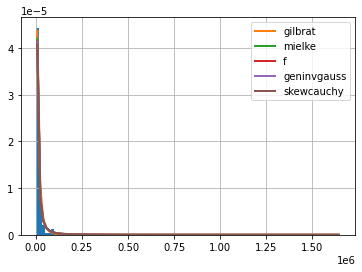

In [22]:
# Warning! It may take a couple of minutes to finish.
# Show the closest distribution to the given sample.
f.summary()

In [23]:
# Get the best fitting distribution.
f.get_best()

{'gilbrat': {'loc': -828.761306204953, 'scale': 10043.420665672524}}

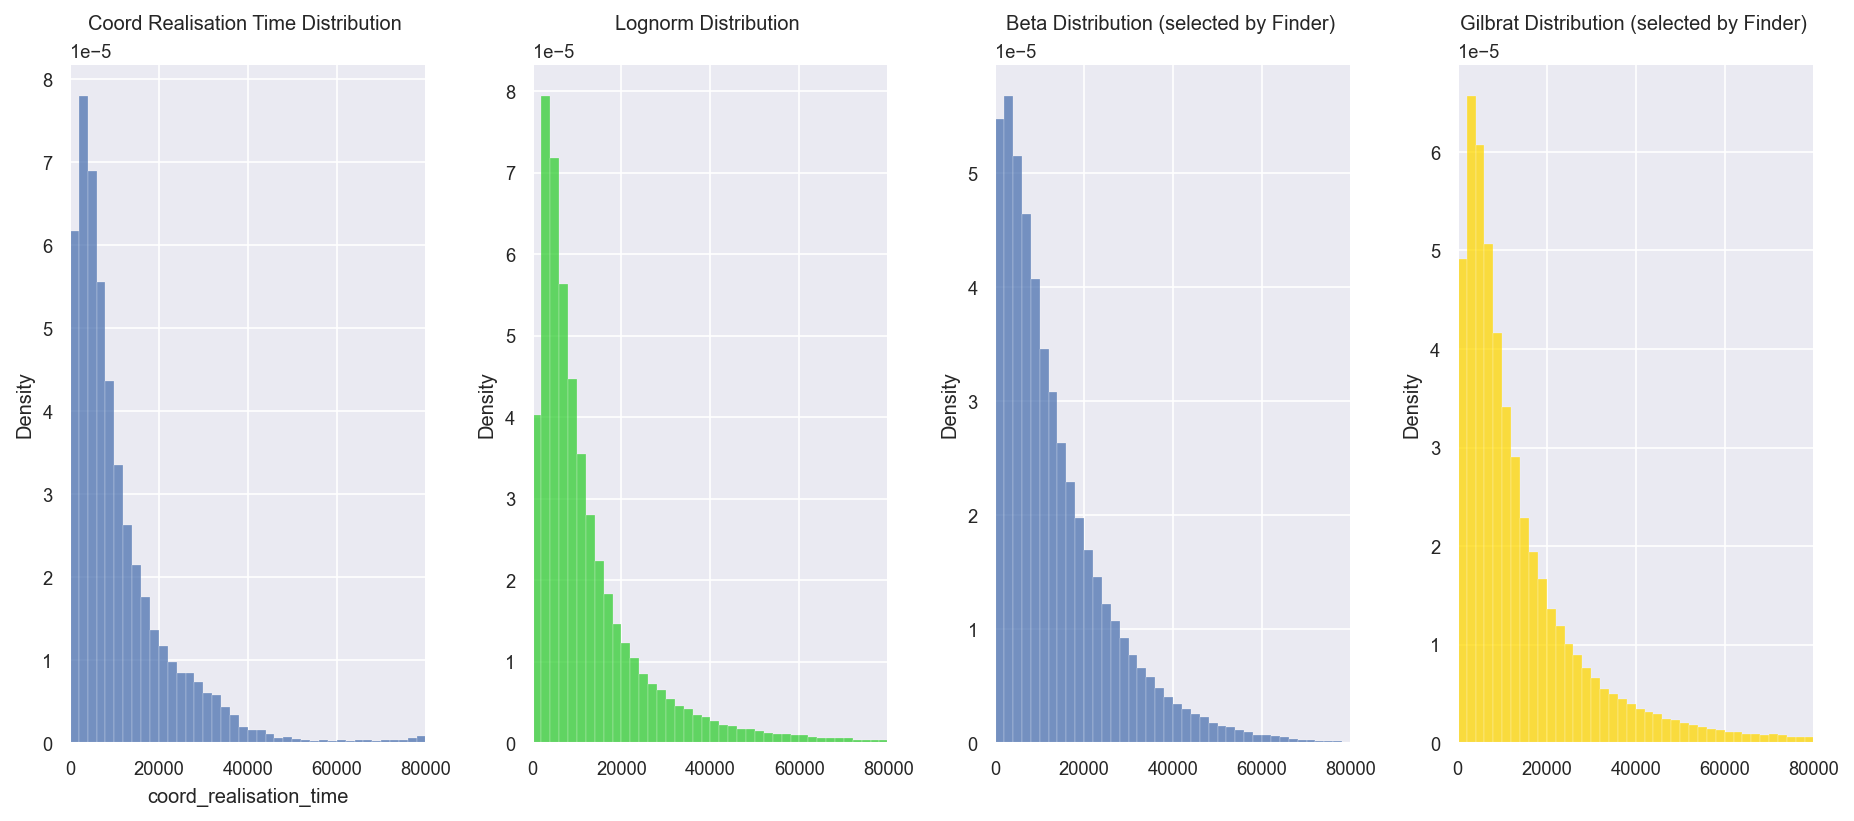

In [23]:
# Set the visual theme for a figures.
sns.set(rc={'figure.figsize':(4,2.5), "figure.dpi":150})
sns.set_theme(style="darkgrid", font_scale=1, context="paper")

# Prepare the figure for 4 plots.
fig, ax =plt.subplots(1,4)

# Create the first plot with "coord_realisation_time" data.
histplot = sns.histplot(distributed_values,
                        stat="density", bins=40, binrange=(0, 80000), ax=ax[0])
histplot.set(xlim=(0, 80000))
ax[0].set_title("Coord Realisation Time Distribution \n")

# Create the second plot with lognorm distribution prepared and fitted by myself.
lognorm = stats.lognorm.rvs(1, size=160000, scale=8200)
lognorm_plot = sns.histplot(lognorm, color="limegreen",
                        stat="density", bins=40, binrange=(0, 80000), ax=ax[1])
lognorm_plot.set(xlim=(0, 80000))
ax[1].set_title("Lognorm Distribution \n")

# Create the third plot with beta distribution, 
# selected by fitter when using sample of 16000 records.
# It's performance is much worse than other disibutions. 
# But I've decided to leave it as an alternative.
beta = stats.beta.rvs(a=1.1525721377351514, b= 668394499142.8708, size=160000, 
                      scale= 8003914867729306.0, loc=-11.472221341286883)
beta_plot = sns.histplot(beta,
                        stat="density", bins=40, binrange=(0, 80000), ax=ax[2])
beta_plot.set(xlim=(0, 80000))
ax[2].set_title("Beta Distribution (selected by Finder) \n")

# Create the fourth plot with gilbrat distribution, the values were fitted by Fitter() functions.
gilbrat = stats.gilbrat.rvs(size=160000, scale= 10043.420665672524, loc=-828.761306204953)
gilbrat_plot = sns.histplot(gilbrat, color= "gold",
                        stat="density", bins=40, binrange=(0, 80000), ax=ax[3])
gilbrat_plot.set(xlim=(0, 80000))
ax[3].set_title("Gilbrat Distribution (selected by Finder) \n")

# Properly space the plots.
fig.set_size_inches(15, 6)
plt.subplots_adjust(wspace=0.3)


In [24]:
# Calculate the Kolmogorov-Smirnov test for each distribution against our data. 
# Smaller sample helps to distnguish the best results.
print("For 1600 Sample Size")
print(stats.ks_2samp(distributed_values.sample(1600), lognorm))
print(stats.ks_2samp(distributed_values.sample(1600), beta))
print(stats.ks_2samp(distributed_values.sample(1600), gilbrat))
print("\n For 16000 Sample Size")
print(stats.ks_2samp(distributed_values.sample(16000), lognorm))
print(stats.ks_2samp(distributed_values.sample(16000), beta))
print(stats.ks_2samp(distributed_values.sample(16000), gilbrat))
# None of the distributions have a statistically significant results, 
# however gilbrat distribution performance is the best.

For 1600 Sample Size
KstestResult(statistic=0.058812500000000045, pvalue=3.327091709916122e-05)
KstestResult(statistic=0.07420624999999992, pvalue=4.955574245758014e-08)
KstestResult(statistic=0.05750624999999998, pvalue=5.392344732631316e-05)

 For 16000 Sample Size
KstestResult(statistic=0.05951249999999997, pvalue=3.192941293059768e-45)
KstestResult(statistic=0.08019375000000001, pvalue=8.225674884948671e-82)
KstestResult(statistic=0.05336249999999998, pvalue=1.9424650968701612e-36)


Rozkład Gilbrata, czyli szczególny przypadek rozkładu logarytmicznie normalnego, najlepiej oddaje rozkład zmiennej "czas pracy nad raportem" (coord_realisation_time).

### Zadanie 5

In [25]:
# Create new variable with month number of coord completion.
valid_data["coord_completion_month"] = valid_data["date_coord_completed"].dt.month

In [26]:
# Create and prepare the DataFrame for plotting.
plt_df = pd.DataFrame(
    valid_data.groupby(["coord_completion_month", "txtdmc"])["idcase"].count()
                    ).unstack(-1, fill_value=0).droplevel(0, axis=1)

In [27]:
plt_df

txtdmc,DMC1,DMC2,DMC3,DMC4,DMC5,DMC6
coord_completion_month,,,,,,
7,7795,7264,8513,5447,848,9
8,8067,7435,9440,7652,782,0
9,7227,5976,8211,6887,736,0
10,8909,6779,10093,8400,659,0
11,8165,7175,10141,7941,525,0
12,872,872,724,913,43,0


Text(0, 0.5, 'Number of Coords')

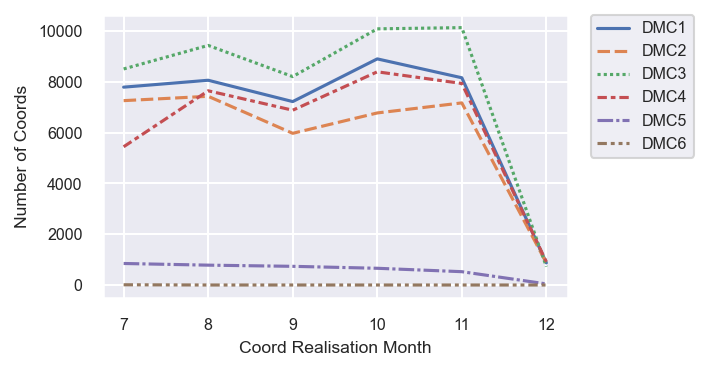

In [29]:
# Make the font smaller.
sns.set_theme(font_scale=0.7)

# Create the lineplot base on our data.
sns.lineplot(data=plt_df)

# Fix the Visuals
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Coord Realisation Month")
plt.ylabel("Number of Coords")

### Zadanie 6

In [30]:
# Create new variable with hour number of coord completion.
valid_data["coord_completion_hour"] = valid_data["date_coord_completed"].dt.hour

In [31]:
valid_data[["coord_completion_hour", "date_coord_completed"]]

,coord_completion_hour,date_coord_completed
0,12,2017-07-07 12:48:00
1,12,2017-07-07 12:48:00
2,15,2017-07-07 15:40:48
3,15,2017-07-07 15:40:48
4,15,2017-07-07 15:40:48
...,...,...
165901,15,2017-07-10 15:40:48
165902,15,2017-07-11 15:40:48
165903,15,2017-07-07 15:40:48
165904,18,2017-07-10 18:00:00


In [32]:
# Create and prepare the DataFrame for plotting.
plt_df2 = pd.DataFrame(
    valid_data.groupby(["coord_completion_hour", "txtdmc"])["idcase"].count()
                    ).unstack(-1, fill_value=0).droplevel(0, axis=1)

In [33]:
plt_df2

txtdmc,DMC1,DMC2,DMC3,DMC4,DMC5,DMC6
coord_completion_hour,,,,,,
0,1,329,5,59,19,0
1,2,163,2,24,22,0
2,0,98,0,4,66,0
3,0,114,0,1,108,0
4,0,11,6,1,995,0
5,1,5,0,6,1227,1
6,31,6,151,951,425,2
7,80,9,1914,4124,205,4
8,1196,356,5589,5545,83,0


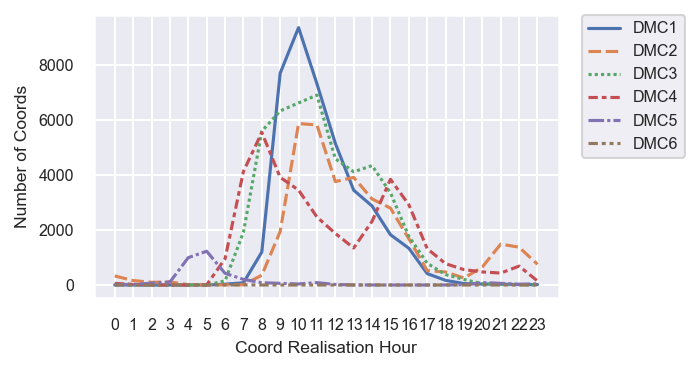

In [34]:
# Create the plot base on our data.
sns.lineplot(data=plt_df2)

# Fix the Visuals.
plt.xticks(plt_df2.index)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Coord Realisation Hour")
plt.ylabel("Number of Coords")
plt.show()

### Zadanie 7

Text(0, 0.5, 'Number of Coords')

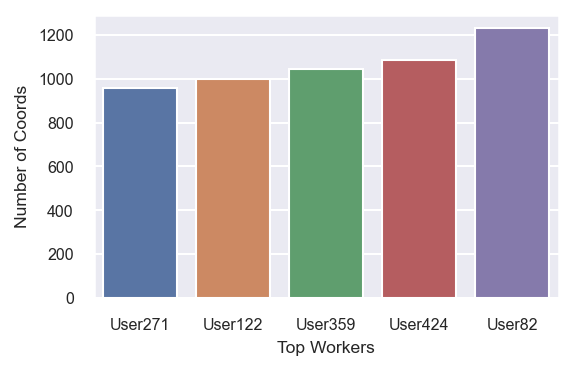

In [35]:
# Select 5 workers with the biggest number of coords completed.
bar_plot_data = valid_data.groupby(["userid_coord_completed"])["idcase"].count().sort_values().tail(5)

# Create the plot.
sns.barplot(x=bar_plot_data.index, y=bar_plot_data.values)

# Fix the Visuals.
plt.xlabel("Top Workers")
plt.ylabel("Number of Coords")

### Zadanie 8

Text(0, 0.5, '% of Coords')

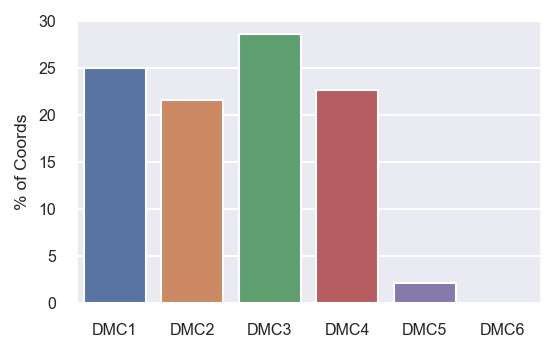

In [36]:
# Select the count of coords grouped by departments. Calculate the percent value of all.
bar_plot_data2 = (valid_data.groupby(["txtdmc"])["idcase"].count()/valid_data["idcase"].count()*100)

# Create the plot.
sns.barplot(x=bar_plot_data2.index, y=bar_plot_data2.values)

# Fix the Visuals.
plt.xlabel("")
plt.ylabel("% of Coords")